This notebook analyses exchange rates of several currencies with respect to USD. Source: https://data.oecd.org/conversion/exchange-rates.htm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/DP_LIVE_28072017153058754.csv')
dataset.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EXCH,TOT,NATUSD,A,1950,0.892857,NaN
1,AUS,EXCH,TOT,NATUSD,A,1951,0.892857,NaN
2,AUS,EXCH,TOT,NATUSD,A,1952,0.892857,NaN
3,AUS,EXCH,TOT,NATUSD,A,1953,0.892857,NaN
4,AUS,EXCH,TOT,NATUSD,A,1954,0.892857,NaN


Select data from different countries separately:

In [82]:
data_aus = dataset[dataset['LOCATION']=='AUS']
data_fin = dataset[dataset['LOCATION']=='FIN']
data_swe = dataset[dataset['LOCATION']=='SWE']
data_che = dataset[dataset['LOCATION']=='CHE']


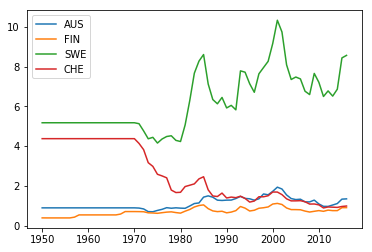

In [83]:
plt.plot(data_aus['TIME'],data_aus['Value'], label='AUS')
plt.plot(data_fin['TIME'],data_fin['Value'], label='FIN')
plt.plot(data_swe['TIME'],data_swe['Value'], label='SWE')
plt.plot(data_che['TIME'],data_che['Value'], label='CHE')

plt.legend(loc='upper left')

plt.show()

Scale to a value of a chosen year to see the relative change:

In [66]:
ref_year = 1970

Find the index of the row corresponding to the selected reference year for each of the datasets (a shorter way may exist but I have not found it yet...)

In [75]:
idx_aus = data_aus['Value'][data_aus['TIME']==ref_year].index.tolist()[0]
idx_aus

20

In [68]:
data_fin.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
362,FIN,EXCH,TOT,NATUSD,A,1950,0.388514,NaN
363,FIN,EXCH,TOT,NATUSD,A,1951,0.386832,NaN
364,FIN,EXCH,TOT,NATUSD,A,1952,0.386832,NaN
365,FIN,EXCH,TOT,NATUSD,A,1953,0.386832,NaN
366,FIN,EXCH,TOT,NATUSD,A,1954,0.386832,NaN


In [69]:
idx_fin = data_fin['Value'][data_fin['TIME']==ref_year].index.tolist()[0]
idx_fin

382

In [70]:
data_swe.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1574,SWE,EXCH,TOT,NATUSD,A,1950,5.172771,NaN
1575,SWE,EXCH,TOT,NATUSD,A,1951,5.173210,NaN
1576,SWE,EXCH,TOT,NATUSD,A,1952,5.173210,NaN
1577,SWE,EXCH,TOT,NATUSD,A,1953,5.173210,NaN
1578,SWE,EXCH,TOT,NATUSD,A,1954,5.173210,NaN


In [71]:
idx_swe = data_swe['Value'][data_swe['TIME']==1950].index.tolist()[0]
idx_swe

1574

In [84]:
idx_che = data_che['Value'][data_che['TIME']==ref_year].index.tolist()[0]
idx_che

1661

Plot the exchange rates scaled to the value of the selected reference year:

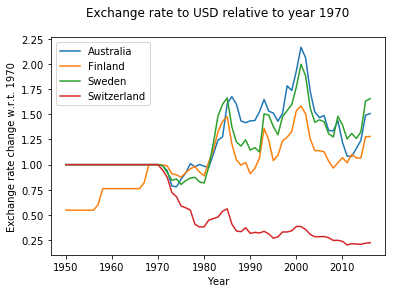

In [90]:
plt.plot(data_aus['TIME'],data_aus['Value']/data_aus['Value'][idx_aus], label='Australia')
plt.plot(data_fin['TIME'],data_fin['Value']/data_fin['Value'][idx_fin], label='Finland')
plt.plot(data_swe['TIME'],data_swe['Value']/data_swe['Value'][idx_swe], label='Sweden')
plt.plot(data_che['TIME'],data_che['Value']/data_che['Value'][idx_che], label='Switzerland')


plt.legend(loc='upper left')

plt.xlabel('Year')
plt.ylabel('Exchange rate change w.r.t. %s'%(ref_year))
plt.title('Exchange rate to USD relative to year %s\n'%(ref_year))

plt.show()